In [61]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [3]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
%pylab inline
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
plt.style.use('dark_background')

Populating the interactive namespace from numpy and matplotlib


D:\Programy\Anaconda\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
def dxdt( x, y ):
    return (-5*x + 5*y)

def dydt( x, y, z ):
    return ( 14*x - 2*y - z*x)

def dzdt( x, y, z):
    return (-3*z + x*y)

In [17]:
def dxdtLorenz( x, y ):
    sigma = 10
    return sigma * (y - x)

def dydtLorenz( x, y, z ):
    rho = 28
    return x * (rho - z) - y

def dzdtLorenz( x, y, z):
    beta = 8/3
    return x * y - beta * z

In [63]:
def euler(x0, y0, z0, n, h):
    XX = []
    YY = []
    ZZ = []
    hlist = []
    hconst = h
    
    XX.append(x0)
    YY.append(y0)
    ZZ.append(z0)
    n = (int)((n)/h)
    for i in range(n-1):        
        x = XX[i] + h * dxdt(XX[i], YY[i])
        y = YY[i] + h * dydt(XX[i], YY[i], ZZ[i])
        z = ZZ[i] + h * dzdt(XX[i], YY[i], ZZ[i])
        
        XX.append(x)
        YY.append(y)
        ZZ.append(z)
        
    for i in range(n):
        hlist.append(h)
        h = h + hconst
    
    print("Predicted values while using Euler's method: x(t): ", x,", y(t): ", y," z(t): ", z)
    plt.figure(figsize=(15,15))
    plt.title('Euler')
    plt.grid(alpha=0.25)
    plt.plot(hlist,XX,label='x(t)')
    plt.plot(hlist,YY,label='y(t)')
    plt.plot(hlist,ZZ,label='z(t)')
    plt.legend(prop={'size': 15});
    
    return XX,YY,ZZ

In [64]:
def rungeKutta(x0, y0, z0, tn, h):
    xx = []
    yy = []
    zz = []
    hlist = []
    hconst = h
    
    xx.append(x0)
    yy.append(y0)
    zz.append(z0)
    n = (int)((tn)/h)
    for i in range(n-1):        
        Fx1 = h * dxdt(xx[i], yy[i])
        Fy1 = h * dydt(xx[i], yy[i], zz[i])
        Fz1 = h * dzdt(xx[i], yy[i], zz[i])
        
        Fx2 = h * dxdt(xx[i] + 0.5 * h, yy[i] + 0.5 * Fy1)
        Fy2 = h * dydt(xx[i] + 0.5 * Fx1, yy[i] + 0.5 * h,  zz[i] + 0.5 * Fz1)
        Fz2 = h * dzdt(xx[i] + 0.5 * Fx1, yy[i] + 0.5 * Fy1, zz[i] + 0.5 * h)
        
        Fx3 = h * dxdt(xx[i] + 0.5 * h, yy[i] + 0.5 * Fx2)
        Fy3 = h * dydt(xx[i] + 0.5 * Fy2, yy[i] + 0.5 * h , zz[i] + 0.5 * Fz1)
        Fz3 = h * dzdt(xx[i] + 0.5 * Fx2, yy[i] + 0.5 * Fy2, zz[i] + 0.5 * h)
        
        Fx4 = h * dxdt(xx[i] + h, yy[i] + Fx3)
        Fy4 = h * dydt(xx[i] + Fx3,yy[i] + h, zz[i] + Fz3)
        Fz4 = h * dzdt(xx[i] + Fx3, yy[i] + Fy3, zz[i] + h)
        
        x = xx[i] + (1.0 / 6.0)*(Fx1 + 2 * Fx2 + 2 * Fx3 + Fx4)
        y = yy[i] + (1.0 / 6.0)*(Fy1 + 2 * Fy2 + 2 * Fy3 + Fy4)
        z = zz[i] + (1.0 / 6.0)*(Fz1 + 2 * Fz2 + 2 * Fz3 + Fz4)
        
        xx.append(x)
        yy.append(y)
        zz.append(z)

    for i in range(n):
        hlist.append(h)
        h = h + hconst
        
    print("Predicted values while using Runge-Kutta method: x(t): ", x,", y(t): ", y," z(t): ", z)
    plt.figure(figsize=(15,15))
    plt.title('Runge Kutta')
    plt.grid(alpha=0.25)
    plt.plot(hlist,xx,label='x(t)')
    plt.plot(hlist,yy,label='y(t)')
    plt.plot(hlist,zz,label='z(t)')
    plt.legend(prop={'size': 15});
    return xx,yy,zz,hlist

In [65]:
def rungeKutta2(x0, y0, z0, tn, h):
    xx = []
    yy = []
    zz = []
    hlist = []
    hconst = h
    
    xx.append(x0)
    yy.append(y0)
    zz.append(z0)
    n = (int)((tn)/h)
    for i in range(n-1):        
        Fx1 = h * dxdtLorenz(xx[i], yy[i])
        Fy1 = h * dydtLorenz(xx[i], yy[i], zz[i])
        Fz1 = h * dzdtLorenz(xx[i], yy[i], zz[i])
        
        Fx2 = h * dxdtLorenz(xx[i] + 0.5 * h, yy[i] + 0.5 * Fy1)
        Fy2 = h * dydtLorenz(xx[i] + 0.5 * Fx1, yy[i] + 0.5 * h,  zz[i] + 0.5 * Fz1)
        Fz2 = h * dzdtLorenz(xx[i] + 0.5 * Fx1, yy[i] + 0.5 * Fy1, zz[i] + 0.5 * h)
        
        Fx3 = h * dxdtLorenz(xx[i] + 0.5 * h, yy[i] + 0.5 * Fx2)
        Fy3 = h * dydtLorenz(xx[i] + 0.5 * Fy2, yy[i] + 0.5 * h , zz[i] + 0.5 * Fz1)
        Fz3 = h * dzdtLorenz(xx[i] + 0.5 * Fx2, yy[i] + 0.5 * Fy2, zz[i] + 0.5 * h)
        
        Fx4 = h * dxdtLorenz(xx[i] + h, yy[i] + Fx3)
        Fy4 = h * dydtLorenz(xx[i] + Fx3,yy[i] + h, zz[i] + Fz3)
        Fz4 = h * dzdtLorenz(xx[i] + Fx3, yy[i] + Fy3, zz[i] + h)
        
        x = xx[i] + (1.0 / 6.0)*(Fx1 + 2 * Fx2 + 2 * Fx3 + Fx4)
        y = yy[i] + (1.0 / 6.0)*(Fy1 + 2 * Fy2 + 2 * Fy3 + Fy4)
        z = zz[i] + (1.0 / 6.0)*(Fz1 + 2 * Fz2 + 2 * Fz3 + Fz4)
        
        xx.append(x)
        yy.append(y)
        zz.append(z)

    for i in range(n):
        hlist.append(h)
        h = h + hconst
    
    print("Predicted values: x(t): ", x,", y(t): ", y," z(t): ", z)
    plt.figure(figsize=(15,15))
    plt.title('Runge Kutta Lorenz')
    plt.grid(alpha=0.25)
    plt.plot(hlist,xx,label='x(t)')
    plt.plot(hlist,yy,label='y(t)')
    plt.plot(hlist,zz,label='z(t)')
    plt.legend(prop={'size': 15});

x = 1  y = 1  z = 1  tn = 5  N = 5000.0  h = 0.001
Predicted values while using Euler's method: x(t):  5.903075962894031 , y(t):  5.848986614786425  z(t):  11.909142827628454
Predicted values while using Runge-Kutta method: x(t):  5.9094385221954004 , y(t):  5.867044319264501  z(t):  11.908595582193785


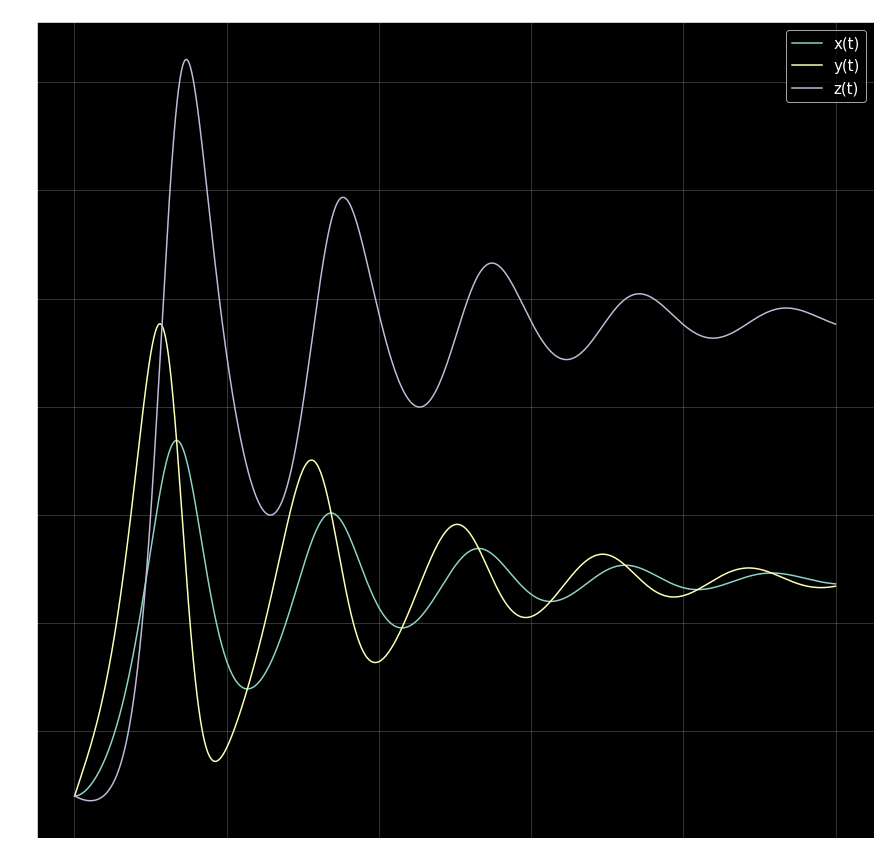

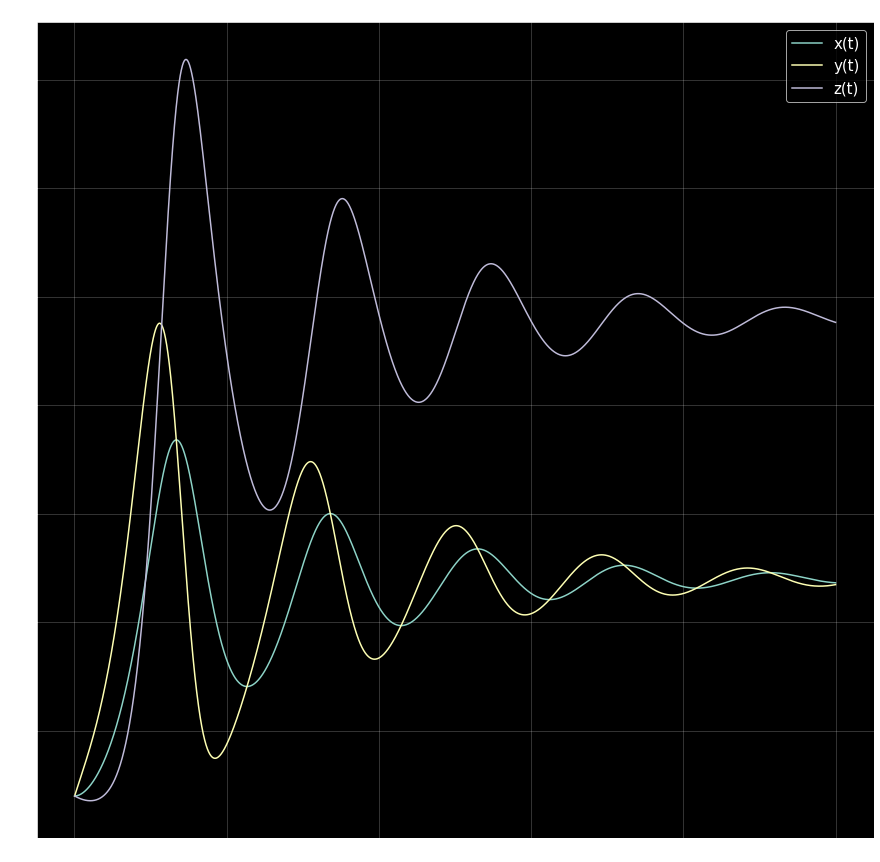

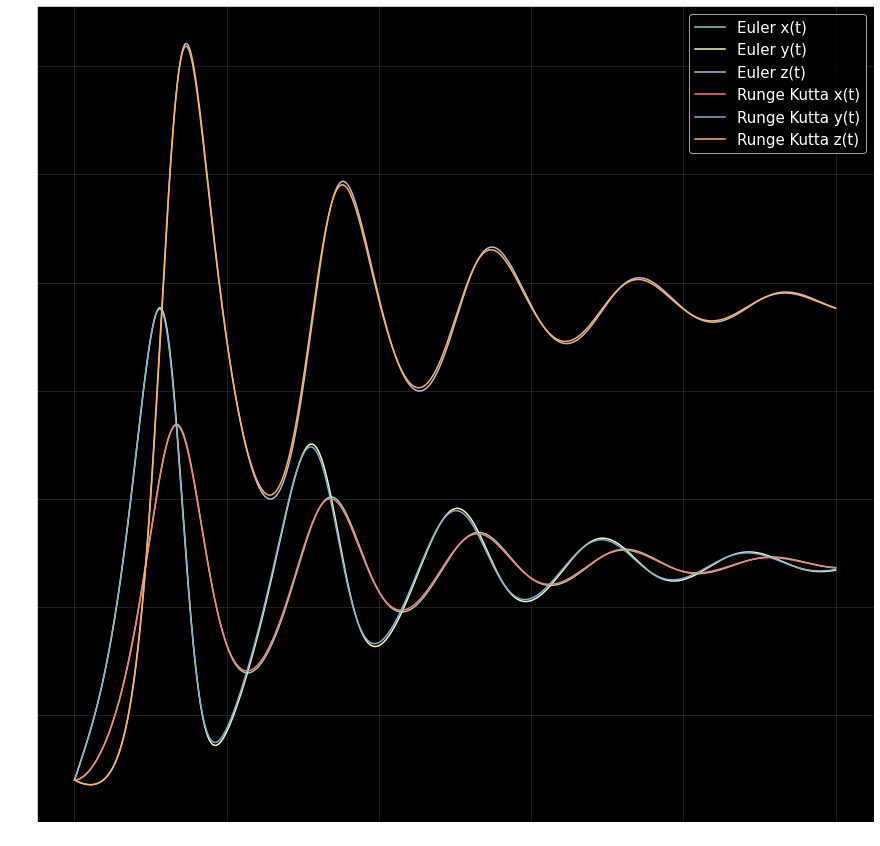

In [70]:
x = 1
y = 1
z = 1
tn = 5
h = 0.001

print("x =",x," y =",y," z =",z," tn =",tn," N =",float(tn/h)," h =",h,)
a,b,c = euler(x, y, z, tn, h)
d,e,f,lista = rungeKutta(x, y ,z, tn, h)

plt.figure(figsize=(15,15))
plt.plot(lista,a,label='Euler x(t)')
plt.plot(lista,b,label='Euler y(t)')
plt.plot(lista,c,label='Euler z(t)')
plt.plot(lista,d,label='Runge Kutta x(t)')
plt.plot(lista,e,label='Runge Kutta y(t)')
plt.plot(lista,f,label='Runge Kutta z(t)')
plt.grid(alpha=0.15)
plt.legend(prop={'size': 15});

Predicted values: x(t):  -7.6409433121363195 , y(t):  -8.704048878737984  z(t):  24.430794278677368


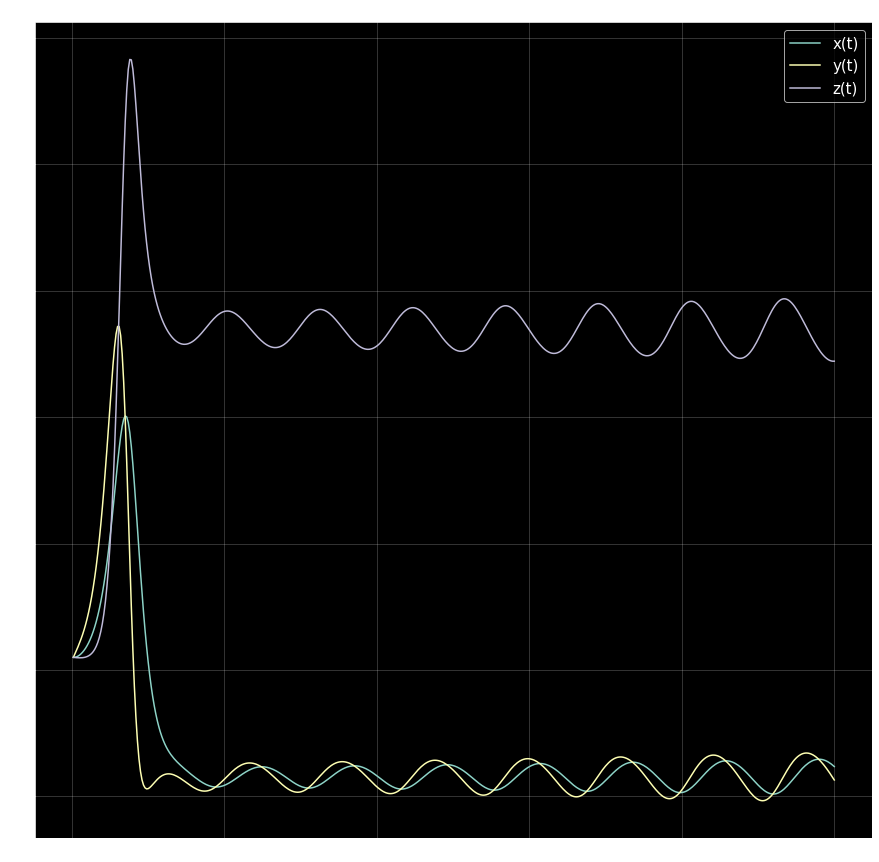

In [67]:
rungeKutta2(x, y ,z, tn, h)